# Measures of variance
> Variance means how much variability there is in the data. Typical statistics that measure variability in the data include:  
+ **Range:** The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the `min` and `max` functions.  
+ **Variance:** The average of the squared difference from the mean. You can use the built-in `var` function to find this.  
+ **Standard Deviation:** The square root of the variance. You can use the built-in `std` function to find this.

In [1]:
# Loading the data
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
students = pd.read_csv('grades.csv', delimiter=',', header='infer')

# Remove any rows with missing data
students.dropna(axis="index", how="any", inplace=True)

# Create a new column to indicate students who have who passed
# and add that to the Pandas dataframe (Passing Grade is 60)
students["Pass"] = students["Grade"] >= 60

--2024-06-01 09:49:03--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2024-06-01 09:49:03 (4.45 MB/s) - ‘grades.csv’ saved [322/322]



In [2]:
# Print the variability statistics for Grade and StudyHours
for col in ["Grade", "StudyHours"]:
  print(f"{col}\n--------- \nRange: {students[col].max() - students[col].min()}\nVariance: {students[col].var()}\nStd. Variation: {students[col].std()}\n\n")

Grade
--------- 
Range: 94.0
Variance: 472.5367965367965
Std. Variation: 21.737911503564376


StudyHours
--------- 
Range: 15.0
Variance: 12.160173160173159
Std. Variation: 3.487143983286775




In [3]:
# Get descriptive statistics of the dataset
students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


# Comparing Data
 > Comparing data involves examining data to identify any apparent relationships between variables.

 > The data includes two numeric variables (`StudyHours` and `Grade`) and two categorical variables (`Name` and `Pass`).

In [4]:
"""
  The StudyHours column contains some outliers with extremely low values,
    hence filtering to remove those rows.
"""
sample = students[students["StudyHours"] > 1]

## Comparing numeric and categorical values
> Let's start by comparing the numeric `StudyHours` column to the categorical `Pass` column to see if there's an apparent relationship between the number of hours studied and a passing grade.

<Figure size 350x350 with 0 Axes>

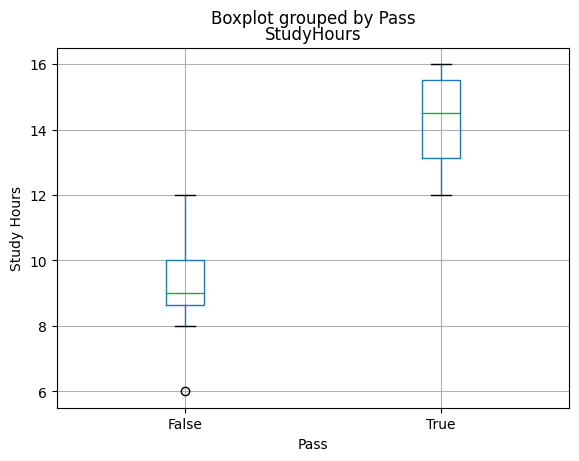

In [5]:
"""
To make this comparison, let's create box plots showing the distribution of
StudyHours for each possible Pass value (true and false)
"""
import matplotlib.pyplot as plt
plt.style.use("fast")

plt.figure(layout="constrained", figsize=(3.5,3.5))
sample.boxplot(column=["StudyHours"], by="Pass")
plt.ylabel("Study Hours")
#plt.gca().set_xticklabels(["Passes", "Fails"])

plt.show()

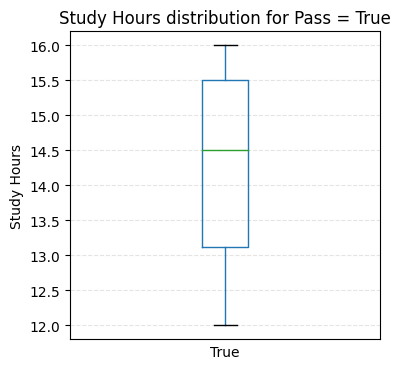

In [6]:
"""
  Single out the StudyHours column for which Pass == True,
    then make a boxplot of that
"""
sample.loc[sample["Pass"] == True, ["StudyHours"]].boxplot(figsize=(4,4))

# Customize the plot using matplotlib method calls
plt.xticks([])
plt.xlabel("True")
plt.ylabel("Study Hours")
plt.title("Study Hours distribution for Pass = True")
plt.grid(axis="y", color="#e5e4e2", linestyle="--")

plt.show()

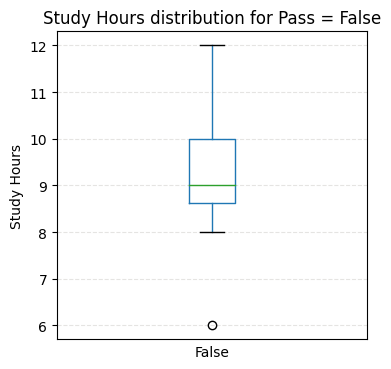

In [7]:
"""
  Single out the StudyHours column for which Pass == False,
    then make a boxplot of that
"""
sample.loc[sample["Pass"] == False, ["StudyHours"]].boxplot(figsize=(4, 4))

# Customize the plot using matplotlib method calls
plt.xticks([])
plt.xlabel("False")
plt.ylabel("Study Hours")
plt.title("Study Hours distribution for Pass = False")
plt.grid(axis="y", color="#e5e4e2", linestyle="--")

plt.show()

## Comparing numeric variables
> Create a bar chart that shows both `Grade` and `StudyHours`

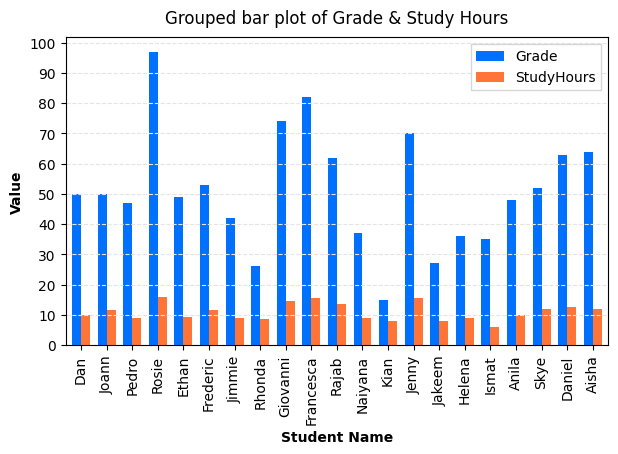

In [17]:
# Generating a grouped bar plot
sample.plot.bar(x='Name', y=['Grade','StudyHours'],
                width=0.7,
                figsize=(7,4),
                color=["#0070ff", "#ff7538"])

# Modify plot with matplotlib function calls
plt.title("Grouped bar plot of Grade & Study Hours", pad=10)
plt.ylabel("Value", weight="black")
plt.xlabel("Student Name", weight="black")
plt.yticks(range(0, 110, 10))
plt.legend(fancybox=False, shadow=False)
plt.grid(axis="y", color="#e5e4e2", linestyle="--")

plt.show()

### **Normalizing data with [`Scikit-Learn`](https://scikit-learn.org/stable/index.html)**
> The chart above shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

> A common technique when dealing with numeric data in different scales is to _normalize_ the data so that the values retain their proportional distribution but are measured on the same scale.
+ To accomplish this, we'll use a technique called MinMax scaling from the [`Scikit-Learn`](https://scikit-learn.org/stable/index.html) library that distributes the values proportionally on a `[0, 1]` range.    
>> Class: [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform)  
>> Method: `fit_transform()` which fits to data then transforms it

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = sample[["Name", "Grade", "StudyHours"]].copy()

# Normalize the numeric columns
df_normalized[["Grade", "StudyHours"]] = scaler.fit_transform(df_normalized[["Grade", "StudyHours"]])

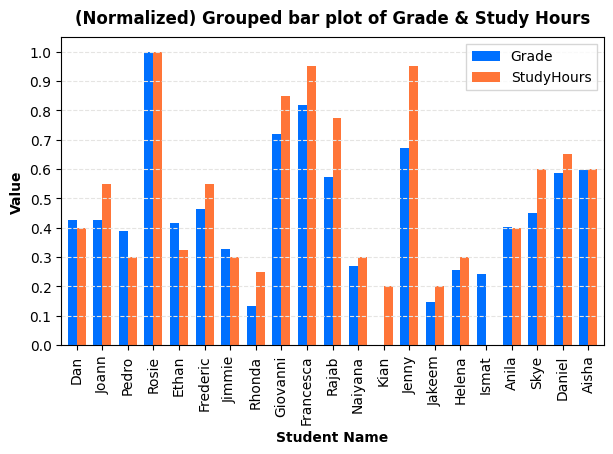

In [18]:
import numpy as np
# Now plot the normalized data
df_normalized.plot.bar(x='Name', y=['Grade','StudyHours'],
                       width=0.7,
                       figsize=(7,4),
                       color=["#0070ff", "#ff7538"])

# Modify plot with matplotlib function calls
plt.title("(Normalized) Grouped bar plot of Grade & Study Hours", pad=10, weight="heavy")
plt.ylabel("Value", weight="black")
plt.xlabel("Student Name", weight="black")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.legend(fancybox=False, shadow=False)
plt.grid(axis="y", color="#e5e4e2", linestyle="--")

plt.show()

### **Correlation**
> With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.  

> So there seems to be a _correlation_ between study time and grade.

> In fact, there's a statistical correlation measurement we can use to quantify the relationship between these columns.  
> + [`pandas.Series.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method can be used to calculate the correlation between 2 columns

> The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a positive correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a negative correlation (high values of one variable tend to coincide with low values of the other).  

> In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

In [11]:
df_normalized["Grade"].corr(df_normalized["StudyHours"])

0.9117666413789677

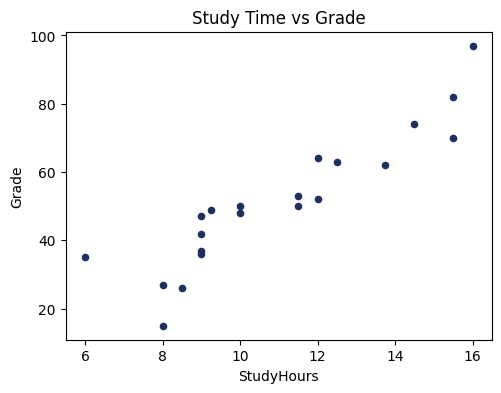

In [12]:
# Visualizing correlation using a scatter plot
sample.plot.scatter(x='StudyHours', y='Grade',
                    figsize=(5.5, 4),
                    marker="o",
                    color="#1f305e")

plt.title('Study Time vs Grade')

plt.show()

### **Adding a regression line** (_line of best fit_)
> From the above scatter plot, it looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades

> This can be seen more clearly by adding a regression line (or a line of best fit) to the plot that shows the general trend in the data. This can be done using a statistical technique called *least squares regression*

> Recall the equation of a straight line is given by `f(x) = mx + b`. In the case of the scatter plot:
> + `y` or `f(x)` - *Grade*
> + `x` - *StudyHours*
> + `m` - *Slope of the line*
> + `b` -  *y-intercept*
> + `f(x) - y` = *error between the regression line and actual grade  

> **The line of best fit is the line that gives us the lowest value for the sum of the squared errors, hence the name _least squares regression_**

> The [`scipy.stats.linregress(x, y)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) from the [`SciPy`](https://docs.scipy.org/doc/scipy/index.html) library can be used to calculate a linear least-squares regression for two sets of measurements; `x` and `y`.  
>> The method call returns a `LinregressResult` instance, containing `slope`, `intercept`, `rvalue`, `pvalue` and `stderr`. Hence, one can write:  
>> + `slope, intercept, r, p, se = linregress(x, y)` or
>> + `result = linregress(x, y)` then accessing the constituent field using the dot `(.)` accessor

In [13]:
import scipy.stats as stats

# Create a new DataFrame for regression operation
df_regression = sample[["Grade", "StudyHours"]].copy()

# Get the LinregressResult instance
result = stats.linregress(x=df_regression["StudyHours"], y=df_regression["Grade"])
# Slope:
m = result.slope
# y-intercept
b = result.intercept

"""
  Use the function (mx + b) to calculate f(x) for each x (StudyHours) value,
    and save that in a new column, "fx"
"""
df_regression["fx"] = (m * df_regression["StudyHours"])  + b

"""
  Calculate the error between f(x) and the actual y (Grade) value
    and save that in a new column, "error"
"""
df_regression["error"] = df_regression["fx"] - df_regression["Grade"]

# Now A look into the Dataframe
df_regression

,Grade,StudyHours,fx,error
0,50.0,10.00,45.217846,-4.782154
1,50.0,11.50,54.687985,4.687985
2,47.0,9.00,38.904421,-8.095579
3,97.0,16.00,83.098400,-13.901600
4,49.0,9.25,40.482777,-8.517223
6,53.0,11.50,54.687985,1.687985
7,42.0,9.00,38.904421,-3.095579
8,26.0,8.50,35.747708,9.747708
9,74.0,14.50,73.628262,-0.371738
10,82.0,15.50,79.941687,-2.058313


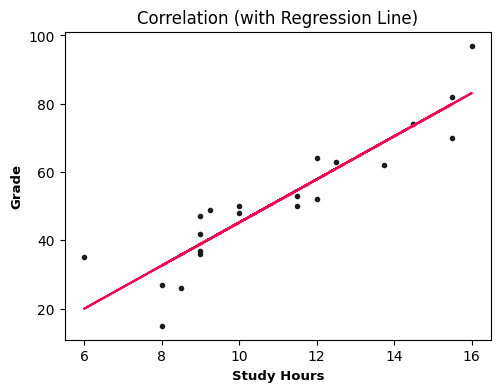

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(5.5, 4))

# Scatter plot of Grade vs StudyHours
ax.scatter(x = df_regression["StudyHours"],
           y = df_regression["Grade"],
           marker=".",
           color="#1b1b1b",
           label="Original data")

# Plot the regression line
plt.plot(df_regression["StudyHours"], df_regression["fx"],
        color = "#ff004f",
        linewidth=1.5)

# Customize the plot with matplotlib methods
ax.set_ylabel("Grade", weight="black", fontsize=9.5)
ax.set_xlabel("Study Hours", weight="black", fontsize=9.5)
ax.set_title("Correlation (with Regression Line)")

plt.show()

#### Using the regression coefficients for prediction

In [15]:
# Define a function based on our regression coefficients
def f(x):
  b = result.intercept
  m = result.slope
  return (m*x) + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print (f"Studying for {study_time} hours per week may result in a grade of {round(expected_grade, 2)}")

Studying for 14 hours per week may result in a grade of 70.47
